In [173]:
import numpy as np  
import pandas as pd  
import seaborn as sns   
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import mean_absolute_error,mean_squared_error  

In [129]:
df=pd.read_csv("IRIS.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [130]:

spec=df["species"].unique()
df.loc[df["species"]==spec[0],"species"]=1
df.loc[df["species"]==spec[1],"species"]=2
df.loc[df["species"]==spec[2],"species"]=3
df["species"]=df["species"].astype(np.int64)
print(df)
print(df.info())

     sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2        1
1             4.9          3.0           1.4          0.2        1
2             4.7          3.2           1.3          0.2        1
3             4.6          3.1           1.5          0.2        1
4             5.0          3.6           1.4          0.2        1
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        3
146           6.3          2.5           5.0          1.9        3
147           6.5          3.0           5.2          2.0        3
148           6.2          3.4           5.4          2.3        3
149           5.9          3.0           5.1          1.8        3

[150 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        ------

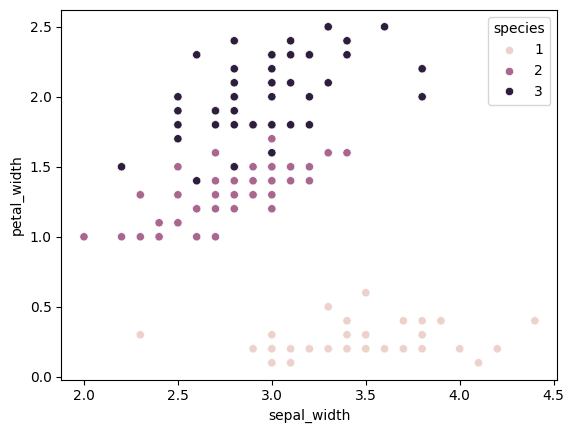

In [131]:
sns.scatterplot(data=df,x="sepal_width",y="petal_width",hue="species")
plt.show()

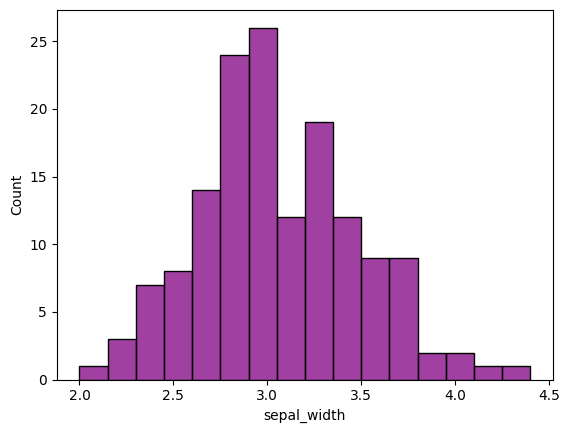

In [132]:
sns.histplot(df["sepal_width"],bins=16,color="purple")
plt.show()

In [139]:
X=df.drop(columns=["species"])
y=df["species"]
print(X,y)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns] 0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    3
147    3
148    3
149    3
Name: species, Length: 150, dtype: int64


In [134]:
X_trian,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_trian.count())

sepal_length    120
sepal_width     120
petal_length    120
petal_width     120
dtype: int64


In [135]:
model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X_trian,y_train)

RandomForestClassifier(random_state=42)

Mean Squared Error: 0.00
Mean Absolute Error: 0.00


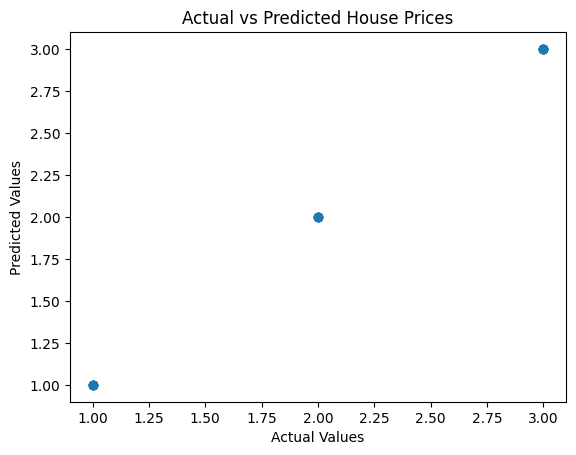

In [172]:

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted House Prices')
plt.show()